# COVID19 Global Timeseries data
Source: [JHU CSSE](https://github.com/CSSEGISandData/COVID-19/tree/master/csse_covid_19_data/csse_covid_19_time_series)

In [70]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
#plt.rcParams
%matplotlib inline

In [30]:
confirmed_cases_url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
covid_confirmed = pd.read_csv(confirmed_cases_url)

recovered_cases_url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv'
covid_recovered = pd.read_csv(recovered_cases_url)

deceased_cases_url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'
covid_deceased = pd.read_csv(deceased_cases_url)

In [56]:
def modify_df(_df):
    # Drop Latitude and Longitude
    _df.drop(['Lat', 'Long'], axis=1, inplace=True)
    
    # Create multiindex
    country_df = _df.filter(['Country/Region', 'Province/State'], axis=1)
    
    # Change the index
    _df.index = pd.MultiIndex.from_frame(country_df)
    del country_df
    
    # Groupby country and sum up the cases
    _df = _df.groupby(level="Country/Region").sum()
    
    # Return a Transposed df which is in a more readable format
    return _df.transpose()   

In [77]:
def cases_by_country(_country):
    
    plt.figure(figsize=(20,10))
    plt.plot(covid_confirmed[_country], 'b*-', label='Confirmed')
    plt.plot(covid_recovered[_country], 'g+-', label='Recovered')
    plt.plot(covid_deceased[_country], 'ro-', label='Deceased')
    plt.legend(loc='best')
    plt.xticks(rotation=45);
    plt.grid(alpha=0.75)
    plt.title(_country +' - COVID19 cases till date');

In [ ]:
covid_confirmed = modify_df(covid_confirmed)
covid_recovered = modify_df(covid_recovered)
covid_deceased = modify_df(covid_deceased)

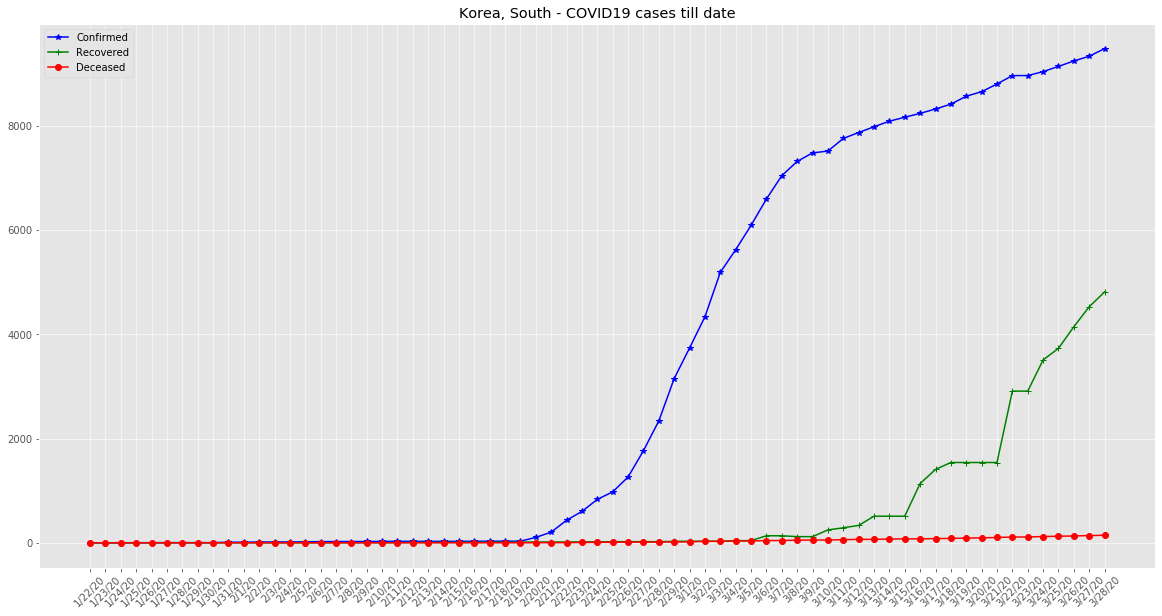

In [89]:
cases_by_country('Korea, South')

In [88]:
for _country in covid_confirmed.columns:
    print(_country)

Afghanistan
Albania
Algeria
Andorra
Angola
Antigua and Barbuda
Argentina
Armenia
Australia
Austria
Azerbaijan
Bahamas
Bahrain
Bangladesh
Barbados
Belarus
Belgium
Belize
Benin
Bhutan
Bolivia
Bosnia and Herzegovina
Brazil
Brunei
Bulgaria
Burkina Faso
Burma
Cabo Verde
Cambodia
Cameroon
Canada
Central African Republic
Chad
Chile
China
Colombia
Congo (Brazzaville)
Congo (Kinshasa)
Costa Rica
Cote d'Ivoire
Croatia
Cuba
Cyprus
Czechia
Denmark
Diamond Princess
Djibouti
Dominica
Dominican Republic
Ecuador
Egypt
El Salvador
Equatorial Guinea
Eritrea
Estonia
Eswatini
Ethiopia
Fiji
Finland
France
Gabon
Gambia
Georgia
Germany
Ghana
Greece
Grenada
Guatemala
Guinea
Guinea-Bissau
Guyana
Haiti
Holy See
Honduras
Hungary
Iceland
India
Indonesia
Iran
Iraq
Ireland
Israel
Italy
Jamaica
Japan
Jordan
Kazakhstan
Kenya
Korea, South
Kosovo
Kuwait
Kyrgyzstan
Laos
Latvia
Lebanon
Liberia
Libya
Liechtenstein
Lithuania
Luxembourg
MS Zaandam
Madagascar
Malaysia
Maldives
Mali
Malta
Mauritania
Mauritius
Mexico
Moldova
M